In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors

#from sklearn.preprocessing import StandardScaler


###  8. Produce a Jupyter Notebook code and use KNN classification on the IRIS dataset contained in the SKLearn datasets library (i.e. sklearn.datasets.load_iris). 

### 8a. What are the features and species of flowers that are measured in this dataset? 

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 8b. Print first 10 measurements taken in this dataset

In [5]:
X2 = iris_dataset.data
iris_df = pd.DataFrame(data = X2,
                                 columns = iris_dataset.feature_names)
iris_df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### 8c. Using only Sepal length and Sepal width to classify flowers, create a color coded scatterplot

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

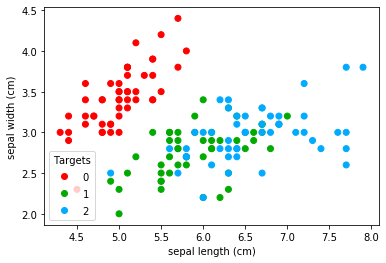

In [10]:
X2a = X2[:, (0,1)]
y2 = iris_dataset.target


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00','#00AAFF'])

# Plot also the training points
fig, ax = plt.subplots()
scatter = ax.scatter(X2a[:, 0], X2a[:, 1], c=y2, cmap=cmap_bold)

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Targets")
plt.show()


### 8d. Using only Petal length and Petal width to classify flowers, create a color coded scatterplot

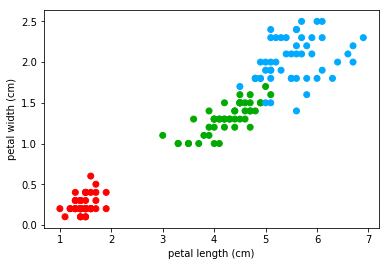

In [7]:
X2a = X2[:, (2,3)]
y2 = iris_dataset.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00','#00AAFF'])

# Plot also the training points
plt.scatter(X2a[:, 0], X2a[:, 1], c=y2, cmap=cmap_bold)
plt.xlabel(iris_dataset.feature_names[2])
plt.ylabel(iris_dataset.feature_names[3])
plt.show()

### 8e. Choose two features and classify using K nearest neighbor and plot the decision boundaries using np.meshgrid, np.ravel and plt.colormesh

In [11]:
#Choose two features from ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
a = 1 
b = 3
X2a = X2[:, (a,b)]
y2 = iris_dataset.target

In [17]:
h = .02  # step size in the mesh

# Calculate min, max and limits
x_min, x_max = X2a[:, 0].min() - 1, X2a[:, 0].max() + 1
y_min, y_max = X2a[:, 1].min() - 1, X2a[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print("X_min = ", x_min, "X_max = ", x_max, "Y_min =", y_min, "Y_max = ", y_max)
print("xx = ")
print(xx)
print("XX shape = ", xx.shape)
print("yy = ")
print(yy)
print("yy shape =", yy.shape)

X_min =  1.0 X_max =  5.4 Y_min = -0.9 Y_max =  3.5
xx = 
[[1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 ...
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]]
XX shape =  (220, 220)
yy = 
[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]
yy shape = (220, 220)


In [13]:
# we create an instance of Neighbours Classifier and fit the data.
n_neighbors=3

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X2a, y2)

# predict class for all points on mesh grid using kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

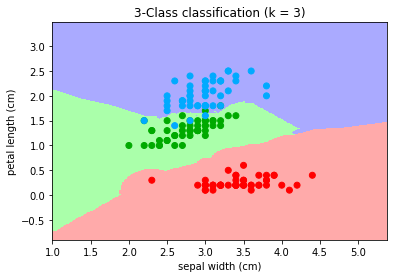

In [14]:
#Color mesh

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X2a[:, 0], X2a[:, 1], c=y2, cmap=cmap_bold)
plt.xlabel(iris_dataset.feature_names[a])
plt.ylabel(iris_dataset.feature_names[b-1])
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()